# Using the Prebuilt React Agent with LangGraph

In this tutorial, we will use the prebuilt React agent from LangGraph.  The agent will use an external web search tool (Tavily) to respond to user queries.



### Imports
We start by importing the necessary libraries:

In [1]:
from langchain_openai import ChatOpenAI
from langchain_community.tools import TavilySearchResults
from langgraph.prebuilt import create_react_agent

from dotenv import load_dotenv
_ = load_dotenv()


In [2]:
# Initialize the model
model = ChatOpenAI(model="gpt-4o")

### ̉Defining the Tools

We will define two tools:
- Tavily Search tool to fetch relevant information from the web.
- A tool to get the current date and time. This helps the agent to respond to time-based queries.


In [3]:
tavily_search = TavilySearchResults(max_results=5)


In [4]:
from langchain_core.tools import tool
from datetime import datetime

@tool
def get_current_date():
    """Returns the current date and time. Use this tool first for any time-based queries."""
    return f"The current date is: {datetime.now().strftime('%d %B %Y')}"

In [5]:

# list of tools for the agent
tools = [tavily_search, get_current_date]

### Creating the ReAct Agent
Next, we will use LangGraph's prebuilt ReAct agent structure. The agent will use the provided tools (in this case, Tavily Search) when necessary, based on the user's query.

In [6]:
graph = create_react_agent(model, tools)

### Visualizing the Agent's Decision-Making Flow
The ReAct agent has a graph based workflow. We can visualize the workflow using langgraph's in-built graph visualization.


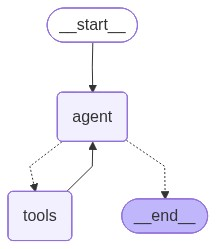

In [7]:
from IPython.display import display, Image

# Visualize the agent's decision-making flow
display(Image(graph.get_graph().draw_mermaid_png()))

### Running the Agent with Queries
Now, we can test our agent with different queries.

In [8]:
# helper function to render markdown
from IPython.display import Markdown, display

def render_markdown(md_string):
    display(Markdown(md_string))

In [9]:
# Helper function to stream the agent's response
def process_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()
    # return the last message
    return message 

In [10]:
# helper function to process query
def process_query(query):
    inputs = {"messages": [("user", query)]}
    message = process_stream(graph.stream(inputs, stream_mode="values"))
    render_markdown(f"## Answer:\n{message.content}")


In [12]:
# Query that will trigger the Tavily search tool
process_query("Who won the latest F1 race in singapore?")

================================ Human Message =================================

Who won the latest F1 race?
================================== Ai Message ==================================
Tool Calls:
  get_current_date (call_e8hWKzYW1REJzzXmZQWk0DRg)
 Call ID: call_e8hWKzYW1REJzzXmZQWk0DRg
  Args:
================================= Tool Message =================================
Name: get_current_date

The current date is: 15 September 2025
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_DxwYN2XQSAPYNHS1SNkefXSr)
 Call ID: call_DxwYN2XQSAPYNHS1SNkefXSr
  Args:
    query: latest F1 race winner September 2025
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.formula1.com/en/latest/article/verstappen-charges-to-italian-gp-win-over-norris-and-piastri.6J7R9E9tzOI9Asy6HBmoVf", "content": "Max Verstappen claimed his third win o

## Answer:
Max Verstappen won the most recent Formula 1 race, which was the Italian Grand Prix held at Monza on September 7, 2025. He drove for Red Bull Racing and finished ahead of McLaren drivers Lando Norris and Oscar Piastri.

In [13]:
# Query that will trigger the Tavily search tool
process_query("What is the weather in Tokyo tomorrow?")

================================ Human Message =================================

What is the weather in Tokyo tomorrow?
================================== Ai Message ==================================
Tool Calls:
  get_current_date (call_ihRXbckwLGLz4PWbSxJYXOj9)
 Call ID: call_ihRXbckwLGLz4PWbSxJYXOj9
  Args:
================================= Tool Message =================================
Name: get_current_date

The current date is: 15 September 2025
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_t6Pj7MJkpZrwGuS3BpN1Zzqr)
 Call ID: call_t6Pj7MJkpZrwGuS3BpN1Zzqr
  Args:
    query: Tokyo weather forecast September 16 2025
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://en.climate-data.org/asia/japan/tokyo/tokyo-3292/t/september-9/", "content": "| 16. September | 23 °C | 73 °F | 26 °C | 78 °F | 20 °C | 68 °F | 25 °C | 78 °F

## Answer:
The weather forecast for Tokyo on September 16, 2025, indicates that there will be patchy rain possible. The expected high temperature is around 87°F (approximately 30.5°C), and the low temperature is around 80°F (approximately 26.6°C). You might want to carry an umbrella or raincoat just in case, as there is a chance of rain.

In [14]:
# Query that will trigger the Tavily search tool
process_query("Is it colder in toronto or singapore today?")

================================ Human Message =================================

Is it colder in toronto or singapore today?
================================== Ai Message ==================================
Tool Calls:
  get_current_date (call_FeP9fhrlVmAkWag4EBSaoX19)
 Call ID: call_FeP9fhrlVmAkWag4EBSaoX19
  Args:
  tavily_search_results_json (call_6cNRaEQAnUCRyOXDaJGlfH3N)
 Call ID: call_6cNRaEQAnUCRyOXDaJGlfH3N
  Args:
    query: current weather in Toronto
  tavily_search_results_json (call_9LNQyc9IsFPQ4A67Ro9LdqBn)
 Call ID: call_9LNQyc9IsFPQ4A67Ro9LdqBn
  Args:
    query: current weather in Singapore
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://world-weather.info/forecast/singapore/singapore/september-2025/", "content": "Weather in Singapore in September 2025. Singapore Weather Forecast for ... Monday, 15 September. Day. +84°. 8.9. 29.8. 77%. +81°. 06:56 am. 07:03 pm. Waning"}, {"url": "https:

## Answer:
Today, September 15, 2025, the weather conditions in Toronto and Singapore are as follows:

- **Toronto:** The current temperature in Toronto is around 24°C (75°F) with mainly sunny conditions. It feels like 23°C. There are no significant alerts, and the forecast for today includes sunny skies.

- **Singapore:** The temperature in Singapore today is approximately 29°C (84°F) with high humidity. The forecast indicates possible patchy rain and some cloud cover.

Comparatively, Toronto is experiencing cooler weather today than Singapore.

### Conclusion 

Congratulations on using a prebuilt ReAct agent with LangGraph!

Here are a few things you can try next:
- Try updating the prompts for the agent to see how it responds to different queries.
- Integrate the agent with additional tools, such as the Python Executor, to enable it to perform calculations.
